In [1]:
pip install pandas

In [3]:
!pip install gdown
!pip install tensorflow-gpu

     |████████████████████████████████| 394.7MB 40kB/s 


In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14, 8
np.random.seed(1)
tf.random.set_seed(1)

print('Tensorflow version:', tf.__version__)


Tensorflow version: 2.4.0


In [5]:
sp=pd.read_csv("SPX.csv")

print("The shape of the raw data is",sp.shape)




The shape of the raw data is (23323, 6)


In [6]:
sp.head()

,Date,Open,High,Low,Close,Volume
0,30/12/1927,17.660000,17.660000,17.660000,17.660000,0
1,03/01/1928,17.760000,17.760000,17.760000,17.760000,0
2,04/01/1928,17.719999,17.719999,17.719999,17.719999,0
3,05/01/1928,17.549999,17.549999,17.549999,17.549999,0
4,06/01/1928,17.660000,17.660000,17.660000,17.660000,0


In [7]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23323 entries, 0 to 23322
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23323 non-null  object 
 1   Open    23323 non-null  float64
 2   High    23323 non-null  float64
 3   Low     23323 non-null  float64
 4   Close   23323 non-null  float64
 5   Volume  23323 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ MB


In [8]:
sp.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
#Replace the Date column with the appropriate type

sp['Date'] = sp.loc[:,'Date'].astype('datetime64[ns]')

sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23323 entries, 0 to 23322
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    23323 non-null  datetime64[ns]
 1   Open    23323 non-null  float64       
 2   High    23323 non-null  float64       
 3   Low     23323 non-null  float64       
 4   Close   23323 non-null  float64       
 5   Volume  23323 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 1.1 MB


In [10]:
#Check how many empty cells there are in each column

sp.isnull().sum().sort_values()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Data Cleaning

In [11]:
# Deletes all rows that have an empty cell

sp= sp[sp.isnull().sum(axis=1)<=1]

sp.shape

(23323, 6)

In [12]:
x=sp.shape[1]
print(x)

6


In [13]:
#Deletes all rows where the volume was less than 100

sp.drop(sp[sp['Volume'] < 100].index, inplace = True) 

sp.shape

(17827, 6)

In [14]:
#Add the column -year, will be used by us later

sp['year'] = sp['Date'].dt.year

sp.head()

,Date,Open,High,Low,Close,Volume,year
5496,1950-03-01,16.66,16.66,16.66,16.66,1260000,1950
5497,1950-04-01,16.85,16.85,16.85,16.85,1890000,1950
5498,1950-05-01,16.93,16.93,16.93,16.93,2550000,1950
5499,1950-06-01,16.98,16.98,16.98,16.98,2010000,1950
5500,1950-09-01,17.08,17.08,17.08,17.08,2520000,1950


In [15]:
#Information about the data types of the columns

sp.dtypes.value_counts()

float64           4
int64             2
datetime64[ns]    1
dtype: int64

In [16]:
#The test begins, is it worth holding the S&P 500 over time?

In [17]:
#Extracting just the fields that we need into a new dataframe with daily data

sp_Close = sp[["Close",'Date']]

In [18]:
#Setting the index of the dataframe to date

sp_Close = sp_Close.set_index('Date')

In [19]:
#Take a look at the first few rows of the dataframe

sp_Close.head()

,Close
Date,
1950-03-01,16.66
1950-04-01,16.85
1950-05-01,16.93
1950-06-01,16.98
1950-09-01,17.08


In [20]:
#Sort the dataframe by date field

sp_Close = sp_Close.sort_index()

In [21]:
#Create 2 new dataframes to hold the monthly average and yearly averages

sp_month = sp_Close.resample('M').mean()

sp_year = sp_Close.resample('Y').mean()

In [22]:
#Take a look at the monthly average price

sp_month.head()

,Close
Date,
1950-01-31,17.432381
1950-02-28,17.667647
1950-03-31,17.646667
1950-04-30,18.038333
1950-05-31,18.519500


In [23]:
#Take a look at the yearly average price

sp_year.head()

,Close
Date,
1950-12-31,18.397269
1951-12-31,22.321888
1952-12-31,24.496160
1953-12-31,24.722590
1954-12-31,29.724087


In [24]:
#S&P 500 closed today Nov. 27, 2020 at 3638.35

#What is the monthly return today had one unit been purchased monthly starting at the very first month

#that we have data for?


tday = 3638.35

sp_month['Return'] = (tday - sp_month['Close'])/sp_month['Close']*100

sp_month.head()

,Close,Return
Date,,
1950-01-31,17.432381,20771.216845
1950-02-28,17.667647,20493.290955
1950-03-31,17.646667,20517.774596
1950-04-30,18.038333,20070.100960
1950-05-31,18.519500,19546.048972


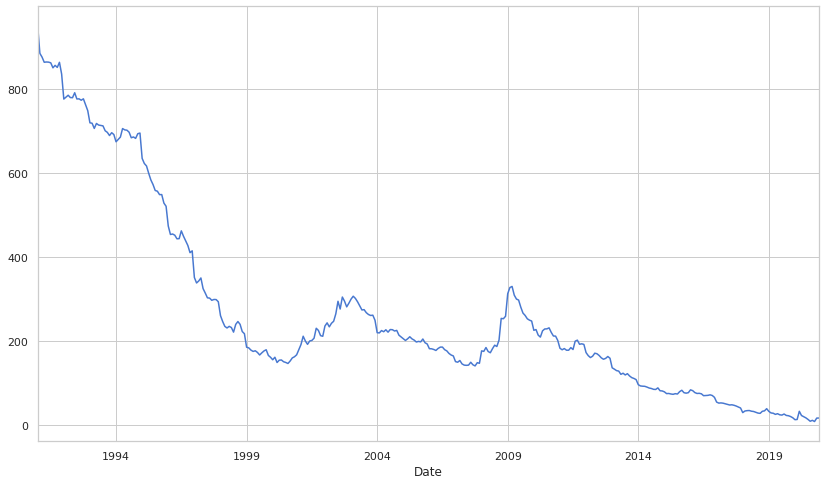

In [25]:
#Over the past 50 years period,

#here is the return of a single unit of S&P 500 over time as of Nov. 27, 2020.

sp_month.iloc[-360:,1].plot()

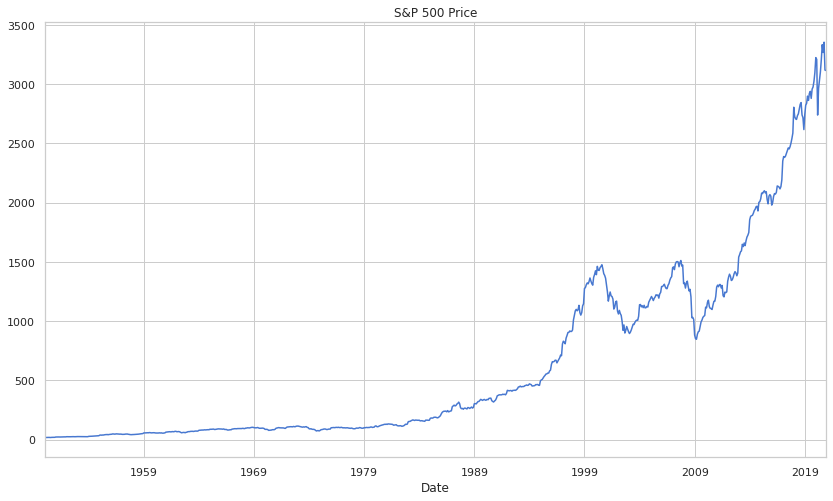

In [26]:
sp_month['Close'].plot(title='S&P 500 Price')

In [27]:
#It will be interesting to see how much the five, ten, fifteen, twenty, twenty

#five and thirty year returns have changed over time. For this we will use the

#yearly average data.

In [28]:
sp_year['5y'] = sp_year['Close'].shift(5)

In [29]:
sp_year['10y'] = sp_year['Close'].shift(10)

sp_year['15y'] = sp_year['Close'].shift(15)

sp_year['20y'] = sp_year['Close'].shift(20)

sp_year['25y'] = sp_year['Close'].shift(25)

In [30]:
#Create a new dataframe to calculate the five year returns over time

fiveyearreturn = sp_year[['Close','5y']].dropna()

fiveyearreturn['Return'] = (fiveyearreturn['Close'] - fiveyearreturn['5y'])/fiveyearreturn['5y']*100

In [31]:
fiveyearreturn.head()

,Close,5y,Return
Date,,,
1955-12-31,40.498849,18.397269,120.135113
1956-12-31,46.639522,22.321888,108.940762
1957-12-31,44.423373,24.496160,81.348313
1958-12-31,46.203452,24.722590,86.887591
1959-12-31,57.418182,29.724087,93.170546


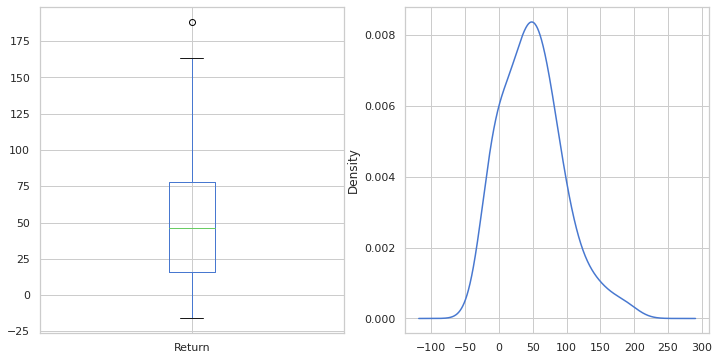

In [32]:
#Create a boxplot and a kde plot of 5 year returns
#The vast majority of the 5 year returns are above zero, which means that more often than not,
#it is hard to lose money in the market if held over a 5 year period.
#Although there are some years with negative returns.
#So had the index been purchased during some months, you could still be in the red after 5 years!

plt.figure(figsize=(12,6))

ax = plt.subplot(121)

fiveyearreturn['Return'].plot(kind='box')

ax = plt.subplot(122)

fiveyearreturn['Return'].plot(kind='kde')

In [33]:
#Create a new dataframe to calculate the ten year returns over time

tenyearreturn = sp_year[['Close','10y']].dropna()

tenyearreturn['Return'] = (tenyearreturn['Close'] - tenyearreturn['10y'])/tenyearreturn['10y']*100

In [34]:
tenyearreturn.head()

,Close,10y,Return
Date,,,
1960-12-31,55.845754,18.397269,203.554585
1961-12-31,66.266320,22.321888,196.867009
1962-12-31,62.320754,24.496160,154.410298
1963-12-31,69.859362,24.722590,182.572996
1964-12-31,81.372885,29.724087,173.760753


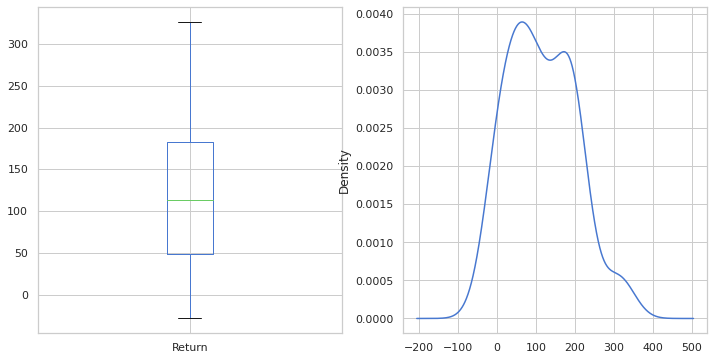

In [35]:
#A look at the 10 year returns shows that holding S&P 500 index over 10

#years shows a largely positive returns,with a median return of 85%.

#Vast majority of the returns were over 100%.

#In some years the returns were above 300% while in others it may have been below 0%!

plt.figure(figsize=(12,6))

ax = plt.subplot(121)

tenyearreturn['Return'].plot(kind='box')

ax = plt.subplot(122)

tenyearreturn['Return'].plot(kind='kde')

In [36]:
#same for 15, 20,25 years

Fifteenyearreturn = sp_year[['Close','15y']].dropna()

Fifteenyearreturn['Return'] = (Fifteenyearreturn['Close'] - Fifteenyearreturn['15y'])/Fifteenyearreturn['15y']*100

twentyyearreturn = sp_year[['Close','20y']].dropna()

twentyyearreturn['Return'] = (twentyyearreturn['Close'] - twentyyearreturn['20y'])/twentyyearreturn['20y']*100

tfiveyearreturn = sp_year[['Close','25y']].dropna()

tfiveyearreturn['Return'] = (tfiveyearreturn['Close'] - tfiveyearreturn['25y'])/tfiveyearreturn['25y']*100
                            

In [37]:
combinedreturn = pd.concat([tenyearreturn['Return'], 
          Fifteenyearreturn['Return'], twentyyearreturn['Return'], 
          tfiveyearreturn['Return']],axis=1, keys=['10y', '15y', '20y', '25y'])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



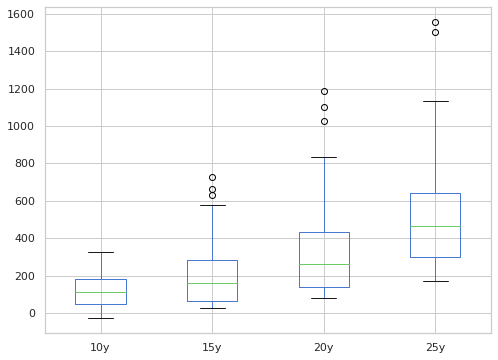

In [38]:
combinedreturn.plot(kind='box', figsize=(8,6))

In [39]:
#Correlation test

In [40]:
DJ=pd.read_csv("DJ.csv")

DJ['Date'] = DJ.loc[:,'Date'].astype('datetime64[ns]')

DJ.head()

,Date,Open,High,Low,Close,Volume
0,2010-04-01,10430.69043,10604.96973,10430.69043,10583.95996,179780000
1,2010-05-01,10584.55957,10584.55957,10522.51953,10572.01953,188540000
2,2010-06-01,10564.71973,10594.99023,10546.54981,10573.67969,186040000
3,2010-07-01,10571.11035,10612.37012,10505.20996,10606.86035,217390000
4,2010-08-01,10606.40039,10619.40039,10554.33008,10618.19043,172710000


In [41]:
DJ['year'] = DJ['Date'].dt.year

DJ.head()

,Date,Open,High,Low,Close,Volume,year
0,2010-04-01,10430.69043,10604.96973,10430.69043,10583.95996,179780000,2010
1,2010-05-01,10584.55957,10584.55957,10522.51953,10572.01953,188540000,2010
2,2010-06-01,10564.71973,10594.99023,10546.54981,10573.67969,186040000,2010
3,2010-07-01,10571.11035,10612.37012,10505.20996,10606.86035,217390000,2010
4,2010-08-01,10606.40039,10619.40039,10554.33008,10618.19043,172710000,2010


In [42]:
#Deletion of all years up to 2010 from the s & p index

sp.drop(sp[sp['year'] < 2010].index, inplace = True) 

sp.head()

,Date,Open,High,Low,Close,Volume,year
20593,2010-04-01,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,2010
20594,2010-05-01,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,2010
20595,2010-06-01,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,2010
20596,2010-07-01,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,2010
20597,2010-08-01,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,2010


In [43]:
# Define a new table where only the closing prices of the index

sp_price = sp[["Date", "Close"]]

sp_price = sp_price.set_index('Date')

sp_price.head()

,Close
Date,
2010-04-01,1132.989990
2010-05-01,1136.520020
2010-06-01,1137.140015
2010-07-01,1141.689941
2010-08-01,1144.979980


In [44]:
sp_price = sp_price.sort_index()

In [45]:
# Make the data a monthly basis

sp_price_mothly = sp_price.resample('M').mean()

sp_price_mothly.head()

,Close
Date,
2010-01-31,1117.599522
2010-02-28,1111.719407
2010-03-31,1158.411900
2010-04-30,1175.990917
2010-05-31,1122.020996


In [46]:
# Define a new table where only the closing prices of the index

DJ_price = DJ[["Date", "Close"]]

DJ_price = DJ_price.set_index('Date')

DJ_price.head()

,Close
Date,
2010-04-01,10583.95996
2010-05-01,10572.01953
2010-06-01,10573.67969
2010-07-01,10606.86035
2010-08-01,10618.19043


In [47]:
# Make the data a monthly basis

DJ_price_mothly = DJ_price.resample('M').mean()

DJ_price_mothly.head()

,Close
Date,
2010-01-31,10450.476237
2010-02-28,10426.117648
2010-03-31,10771.488141
2010-04-30,10916.006303
2010-05-31,10489.033058


In [48]:
# Define a new table in which only the closing prices of the two indices

closing_prices=pd.merge(sp_price_mothly, DJ_price_mothly, on="Date",suffixes=(' S&P 500', ' DJ'))

closing_prices.head()

,Close S&P 500,Close DJ
Date,,
2010-01-31,1117.599522,10450.476237
2010-02-28,1111.719407,10426.117648
2010-03-31,1158.411900,10771.488141
2010-04-30,1175.990917,10916.006303
2010-05-31,1122.020996,10489.033058


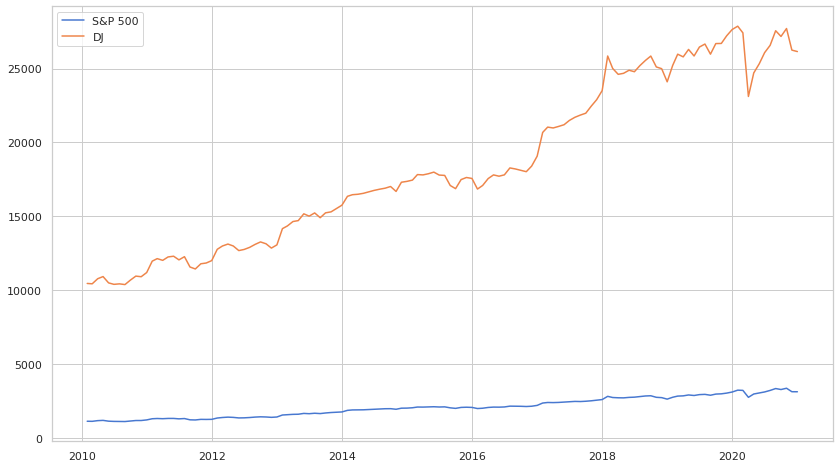

In [49]:
# Graph showing the prices of both indices over time

plt.plot(closing_prices)

plt.legend(['S&P 500', 'DJ'], loc=2)

In [50]:
# Build a new table, in which each row expresses the change from the previous month in percentages

returns=pd.DataFrame()

for measure in closing_prices:
   
    if measure not in returns:
      
        returns[measure]= np.log(closing_prices[measure]).diff()

returns=returns[1:]                

returns.head()

,Close S&P 500,Close DJ
Date,,
2010-02-28,-0.005275,-0.002334
2010-03-31,0.041142,0.032589
2010-04-30,0.015061,0.013328
2010-05-31,-0.046980,-0.039900
2010-06-30,-0.013565,-0.009512


In [51]:
# Do an initial statistical comparison, 

#it is important to make sure we have the same number of values (Column Count)

returns.describe()

,Close S&P 500,Close DJ
count,131.000000,131.000000
mean,0.007823,0.007003
std,0.029086,0.028662
min,-0.158369,-0.170934
25%,-0.003546,-0.004350
50%,0.008935,0.006695
75%,0.020883,0.019288
max,0.091628,0.094986


In [52]:
returns.corr()

,Close S&P 500,Close DJ
Close S&P 500,1.000000,0.972514
Close DJ,0.972514,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a8e083780>,
      dtype=object)

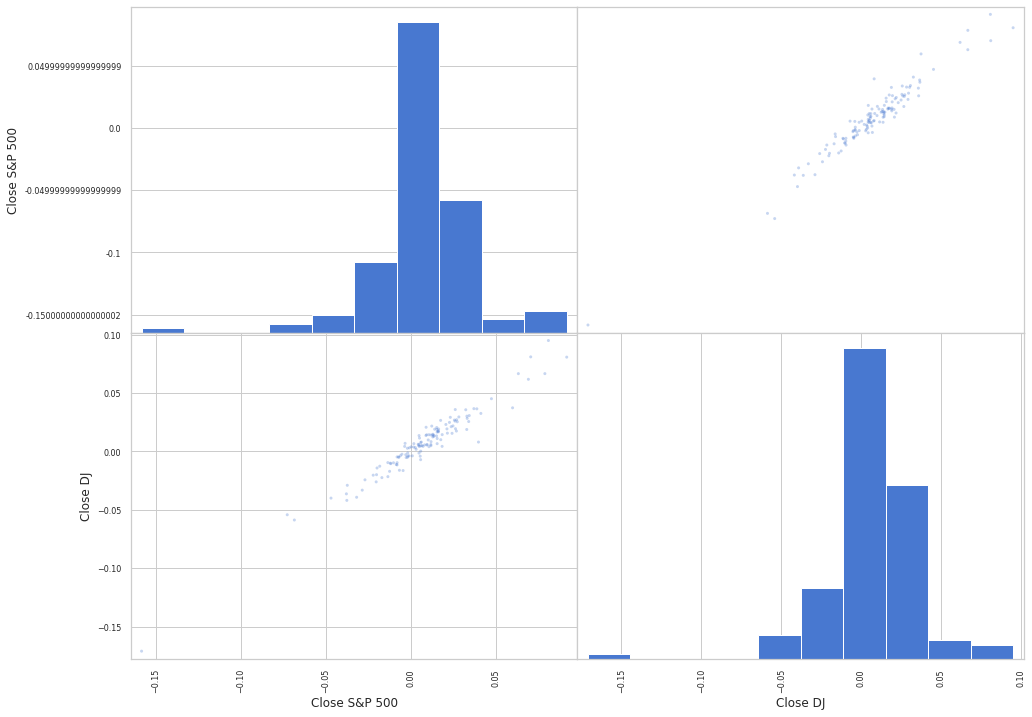

In [53]:
from pandas.plotting import scatter_matrix

scatter_matrix(returns,figsize=(16,12),alpha=0.3)

In [54]:
#Anomaly examination

In [55]:
sp.head()

,Date,Open,High,Low,Close,Volume,year
20593,2010-04-01,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,2010
20594,2010-05-01,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,2010
20595,2010-06-01,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,2010
20596,2010-07-01,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,2010
20597,2010-08-01,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,2010


In [56]:
sp_anomaly=sp[['Date', 'Close']]

In [57]:
sp_anomaly.head()

,Date,Close
20593,2010-04-01,1132.989990
20594,2010-05-01,1136.520020
20595,2010-06-01,1137.140015
20596,2010-07-01,1141.689941
20597,2010-08-01,1144.979980


In [58]:
#We’ll use 80% of the data and train our model on it:

train_size = int(len(sp_anomaly) * 0.80)

test_size = len(sp_anomaly) - train_size

train, test = sp_anomaly.iloc[0:train_size], sp_anomaly.iloc[train_size:len(sp_anomaly)]

print(train.shape, test.shape)

(2184, 2) (546, 2)


In [59]:
#we’ll rescale the data using the training data and apply the same transformation to the test data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler = scaler.fit(train[['Close']])

train['Close'] = scaler.transform(train[['Close']])

test['Close'] = scaler.transform(test[['Close']])

In [60]:
#we’ll split the data into subsequences Using a function

def create_dataset(X, y, time_steps=1):
   
    Xs, ys = [], []
   
    for i in range(len(X) - time_steps):
      
        v = X.iloc[i:(i + time_steps)].values
      
        Xs.append(v)        
     
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [61]:
#We’ll create sequences with 30 days worth of historical data:

time_steps = 30

X_train, y_train = create_dataset(train[['Close']], train.Close, time_steps)

X_test, y_test = create_dataset(test[['Close']], test.Close, time_steps)

print(X_train.shape)

(2154, 30, 1)


In [62]:
timesteps = X_train.shape[1]
num_features = X_train.shape[2]

In [63]:
#Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

model = Sequential([
    LSTM(128, input_shape=(timesteps, num_features)),
    Dropout(0.2),
    RepeatVector(timesteps),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(num_features))                 
])

model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 30, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
__________________________________________________

In [64]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks = [es],
    shuffle=False
)

Epoch 1/100
61/61 [==============================] - 9s 86ms/step - loss: 0.4394 - val_loss: 0.2086
Epoch 2/100
61/61 [==============================] - 4s 69ms/step - loss: 0.2618 - val_loss: 0.1323
Epoch 3/100
61/61 [==============================] - 4s 72ms/step - loss: 0.1039 - val_loss: 0.1900
Epoch 4/100
61/61 [==============================] - 4s 70ms/step - loss: 0.1630 - val_loss: 0.0887
Epoch 5/100
61/61 [==============================] - 4s 70ms/step - loss: 0.1304 - val_loss: 0.1092
Epoch 6/100
61/61 [==============================] - 4s 72ms/step - loss: 0.1585 - val_loss: 0.0826
Epoch 7/100
61/61 [==============================] - 4s 72ms/step - loss: 0.1987 - val_loss: 0.0784
Epoch 8/100
61/61 [==============================] - 4s 70ms/step - loss: 0.1998 - val_loss: 0.0691
Epoch 9/100
61/61 [==============================] - 4s 69ms/step - loss: 0.1053 - val_loss: 0.0680
Epoch 10/100
61/61 [==============================] - 5s 76ms/step - loss: 0.1198 - val_loss: 0.0648

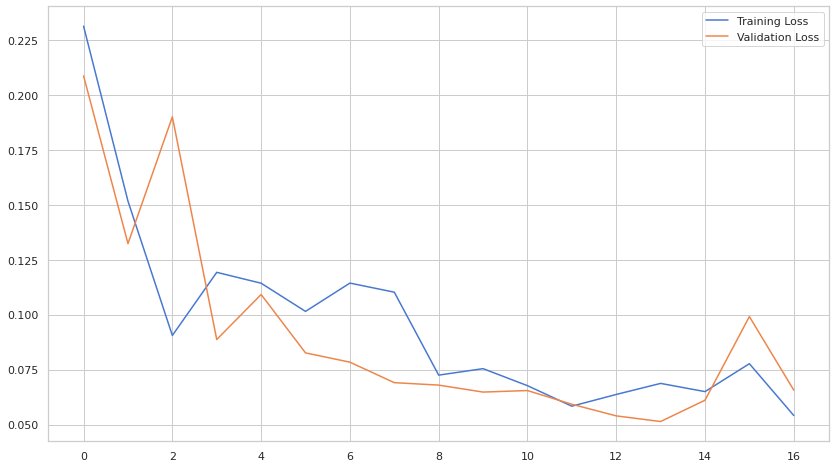

In [65]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();

In [66]:
model.evaluate(X_test, y_test)

17/17 [==============================] - 1s 28ms/step - loss: 0.1007


0.10068828612565994

In [67]:
X_train_pred = model.predict(X_train)

train_mae_loss = pd.DataFrame(np.mean(np.abs(X_train_pred - X_train), axis=1), columns=['Error'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



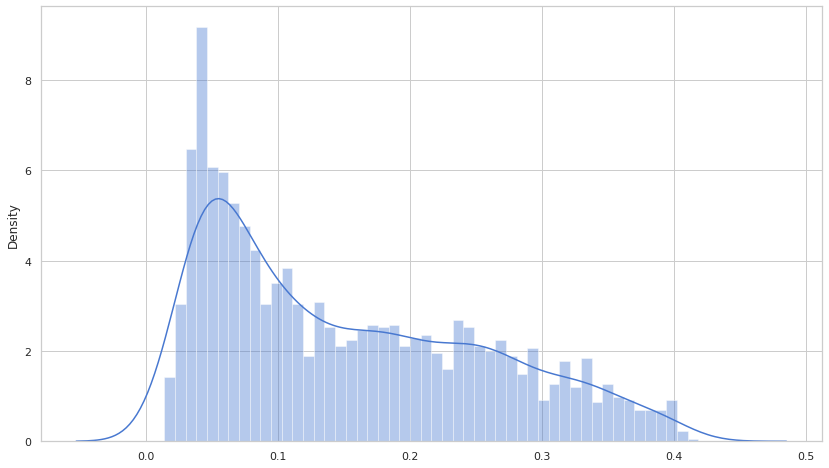

In [68]:
sns.distplot(train_mae_loss, bins=50, kde=True);

In [69]:
X_test_pred = model. predict(X_test)

test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

In [70]:

THRESHOLD = 0.65

test_score_df = pd.DataFrame(test[time_steps:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['Close'] = test[time_steps:].Close

In [71]:
test_score_df.head()

,Date,Close,loss,threshold,anomaly
22807,2018-10-18,1.887381,0.233834,0.65,False
22808,2018-10-19,1.885382,0.243575,0.65,False
22809,2018-10-22,1.861601,0.248602,0.65,False
22810,2018-10-23,1.831245,0.257785,0.65,False
22811,2018-10-24,1.662197,0.271571,0.65,False


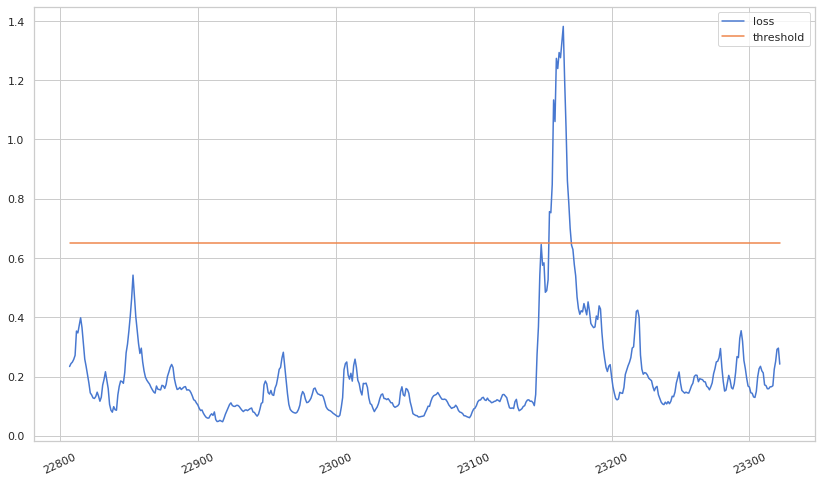

In [72]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend();

In [73]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies.head()

,Date,Close,loss,threshold,anomaly
23155,2020-10-03,2.114103,0.756502,0.65,True
23156,2020-11-03,1.832623,0.752742,0.65,True
23157,2020-12-03,1.311551,0.847879,0.65,True
23158,2020-03-13,1.771951,1.133445,0.65,True
23159,2020-03-16,1.122679,1.060465,0.65,True


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



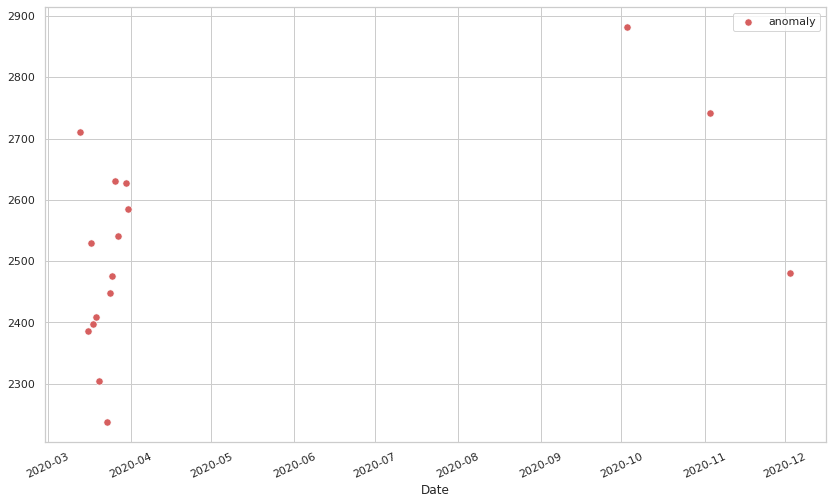

In [74]:
plt.plot(
  #test[TIME_STEPS:].Date, 
  #scaler.inverse_transform(test[TIME_STEPS:].Close), 
  #label='close price'
);

sns.scatterplot(
  anomalies.Date,
  scaler.inverse_transform(anomalies.Close),
  color=sns.color_palette()[3],
  s=52,
  label='anomaly'
)
plt.xticks(rotation=25)
plt.legend();